# New York City Airbnb study

## Introduction
    This study analyzes the rental market in New York City Airbnb using a comprehensive dataset from 2019, which contains 48,894 observations across 16 variables. From these variables, we specifically focus on four key metrics: price, neighbourhood group, room type, and number of reviews. The primary purpose of this analysis are to:
    1. Examine price differentials across different geographical locations within NYC
    2. Analyze price differentials among various room types
    3. Investigate potential correlations between the number of reviews and pricing
    By focusing on these aspects, this study aims to provide valuable insights into market dynamics and help Airbnb hosts optimize their pricing strategies in the NYC

##  1. Data Cleaning and Preprocessing

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sales = pd.read_csv('AB_NYC_2019_72a7dadcc6bdb85ead26987cdd0af151.csv')

###  1.1 Identification of misssing values
Initial dataset identified missing values in four variables:  
- name (16 miss)
- host_name(21 miss)
- last_review(10052 miss)
- reviews_per_month (10052 miss)
  


)  sis.

In [44]:
#A Boolean for every single value saying whether the value is missing or not
sales.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [51]:
#A Boolean Series for each column saying whether the value is missing or not
sales.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [24]:
#Count the number of NAs for each variable
sales.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 1.2 Handling of misssing values —— deletion
In case there are missing values but the variables of missing values do not affect the analysis, drop the variables directly

In [60]:
# drop them
sales_cleaned = sales.dropna(axis=1)
print("\nmodified：\n", sales_cleaned)


modified：
              id   host_id neighbourhood_group       neighbourhood  latitude  \
0          2539      2787            Brooklyn          Kensington  40.64749   
1          2595      2845           Manhattan             Midtown  40.75362   
2          3647      4632           Manhattan              Harlem  40.80902   
3          3831      4869            Brooklyn        Clinton Hill  40.68514   
4          5022      7192           Manhattan         East Harlem  40.79851   
...         ...       ...                 ...                 ...       ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057   6570630            Brooklyn            Bushwick  40.70184   
48892  36485431  23492952           Manhattan              Harlem  40.81475   
48893  36485609  30985759           Manhattan      Hell's Kitchen  40.75751   
48894  36487245  68119814           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  pric

### 1.3 Recheck

In [28]:
#Recheck the missing values in"modified"
sales_cleaned.isna()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
sales_cleaned.isna().any()

id                                False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [32]:
sales_cleaned.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 1.4 Select and save
    For the new dataset:
    Rangeindex: 48895 entries, 0 to 48894
    Data columns(total 5 colunmns): neighbourhood group, neighbourhood, room type, price and number of reviews
    The types of neighbourhood group, neighbourhood and room type are object. The type of price and number of reviews are int64

In [36]:
#select variables
sales_sel = sales_cleaned[['neighbourhood_group','neighbourhood','room_type','price','number_of_reviews']]
print(sales_sel)

      neighbourhood_group       neighbourhood        room_type  price  \
0                Brooklyn          Kensington     Private room    149   
1               Manhattan             Midtown  Entire home/apt    225   
2               Manhattan              Harlem     Private room    150   
3                Brooklyn        Clinton Hill  Entire home/apt     89   
4               Manhattan         East Harlem  Entire home/apt     80   
...                   ...                 ...              ...    ...   
48890            Brooklyn  Bedford-Stuyvesant     Private room     70   
48891            Brooklyn            Bushwick     Private room     40   
48892           Manhattan              Harlem  Entire home/apt    115   
48893           Manhattan      Hell's Kitchen      Shared room     55   
48894           Manhattan      Hell's Kitchen     Private room     90   

       number_of_reviews  
0                      9  
1                     45  
2                      0  
3              

In [64]:
sales_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  48895 non-null  object
 1   neighbourhood        48895 non-null  object
 2   room_type            48895 non-null  object
 3   price                48895 non-null  int64 
 4   number_of_reviews    48895 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [38]:
# save the modified dataframe 
sales_sel.to_csv('AB_2_modified.csv')

## 2. Descriptive Statistical Analysis

### 2.1 price
    There are 48895 numbers in price. Their mean is about 152.72. Standard deviation is about 240.15. The range is from 0 to 10000. Then the first quartile is 69，the second quatile is 106 and the third quartile is 175. The median of price is 106.
    The graph shows the price distribution of Airbnb listings in NYC.
    The distribution is heavily right-skewed, the vast majority of listings are concentrated in the lower price range.
    And it shows a very tall peak near the lower price range, the highest frequency occurs around the $0-500 range, with approximately 45,000 times.The frequency drops dramatically after the peak. There's a long tail extending towards higher prices. Very few observations are priced above $2,000
    
    Finding: This suggests that the object of NYC's Airbnb market is the budget-conscious and middle-market travelers.

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
median: 106.0


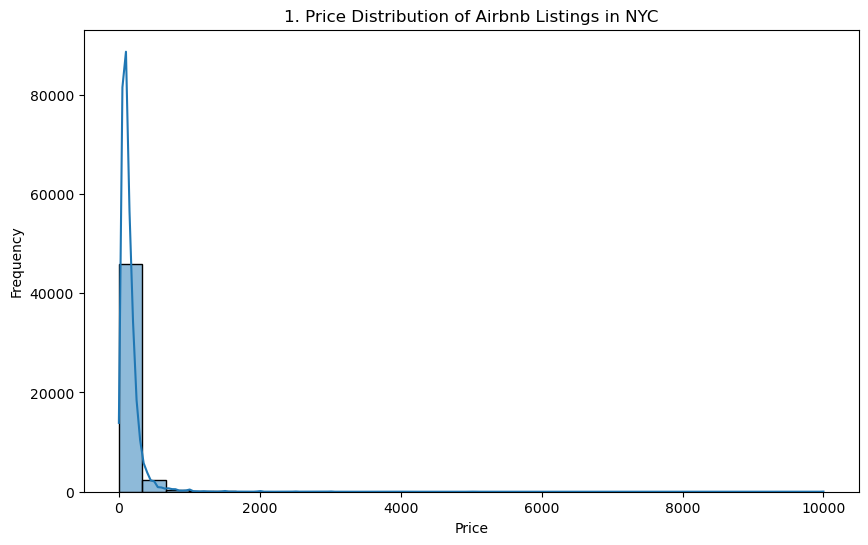

In [209]:
#descriptive
price_desc = sales_sel['price'].describe()
print(price_desc)
median = np.median(sales_sel['price'])
print(f"median: {median}")
#visualization
plt.figure(figsize=(10, 6))
sns.histplot(sales_sel['price'], bins=30, kde=True)
plt.title('1. Price Distribution of Airbnb Listings in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 2.2 price-neighbourhood group
    1.The figure of Mean price by neighourhood group shows:
    Manhattan has the highest mean price at approximately $195 per night
    The Bronx has the lowest mean price at around $85 per night
    -Findings:
    Clear price hierarchy exists among the groups
    Large price gap between Manhattan and other groups. Hence, Manhattan likely has a central location or business district proximity
    
    2. The boxplot of price by neibourhood group shows:
    All neighborhoods show right-skewed distributions (mean > median)
    Magnitude of skewness varies significantly by groups
    Manhattan shows most extreme skewness
    Manhattan:
    Highest concentration of high-priced listings
    Many outliers in upper price ranges, high outliers pulling mean upward substantially
    Brooklyn:
    Similar pattern to Manhattan but slightly lower prices
    Queens:
    Fewer extreme outliers
    Most prices concentrated in lower ranges
    Staten Island:
    Fewer outliers overall
    Bronx:
    Most concentrated in lower price range 
    Fewest outliers
    Smallest gap between mean and median
    -Findings:
    All areas have some upscale hotel (outliers)
    Base prices (box area) relatively similar across groups
    Luxury market strongest in Manhattan and Brooklyn
    Outer group focus more on budget-friendly options

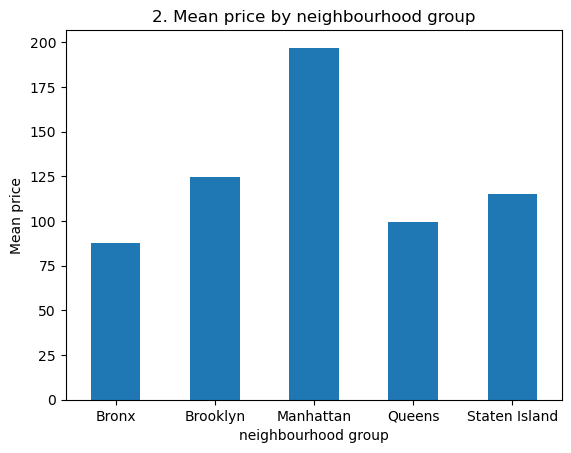

In [211]:
# Visualize and compare the average price across different neighbour group
# Prepare the data: get the mean price of each neighbour
sales_sel_mean_group = sales_sel.groupby('neighbourhood_group')['price'].mean()

# Method 1: Using the plot method from pandas
sales_sel_mean_group.plot(kind = 'bar', rot = 0)

# Add a main title and labels for the x and y axes
plt.title('2. Mean price by neighbourhood group')
plt.xlabel('neighbourhood group')
plt.ylabel('Mean price')

# Show the plot
plt.show()

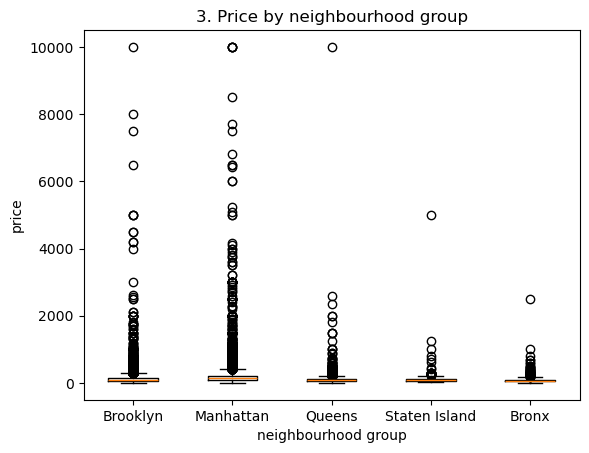

In [231]:
df = pd.read_csv('AB_2_modified.csv')

fig, ax = plt.subplots()
Brooklyn = df[df['neighbourhood_group'] == 'Brooklyn']
Manhattan = df[df['neighbourhood_group'] == 'Manhattan']
Queens = df[df['neighbourhood_group'] == 'Queens']
Staten_Island = df[df['neighbourhood_group'] == 'Staten Island']
Bronx = df[df['neighbourhood_group'] == 'Bronx']

ax.boxplot([Brooklyn['price'],
             Manhattan['price'],
           Queens['price'],
           Staten_Island['price'],
           Bronx['price']])
ax.set_xticklabels(['Brooklyn','Manhattan','Queens','Staten Island','Bronx'])
ax.set_ylabel('price')
ax.set_title('3. Price by neighbourhood group')
ax.set_xlabel('neighbourhood group')

plt.show()

### 2.3 price - neighbourhood group - room type
    The figure4 shows:
    Manhattan has the highest prices across all accommodation types, Staten Island and the Bronx generally have lower prices, Brooklyn and Queens fall in the middle range
    Entire home/apartments (blue bars) are consistently the most expensive option, private rooms (orange bars) are the second most expensive, shared rooms (green bars) are consistently the least expensive
    The gap between entire homes and private rooms is largest in Manhattan
    All groups maintain the same pricing hierarchy: entire home > private room > shared room

    Findings:
    Manhattan has a significant premium across all accommodation types
    Outer groups (especially Bronx and Staten Island) offer more affordable options
    Brooklyn prices suggest it's the second most expensive borough for accommodations

In [179]:
#compute the price of each room type of each neighbourhood group
avg_price = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

pd.crosstab(df['neighbourhood_group'], df['room_type'])

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


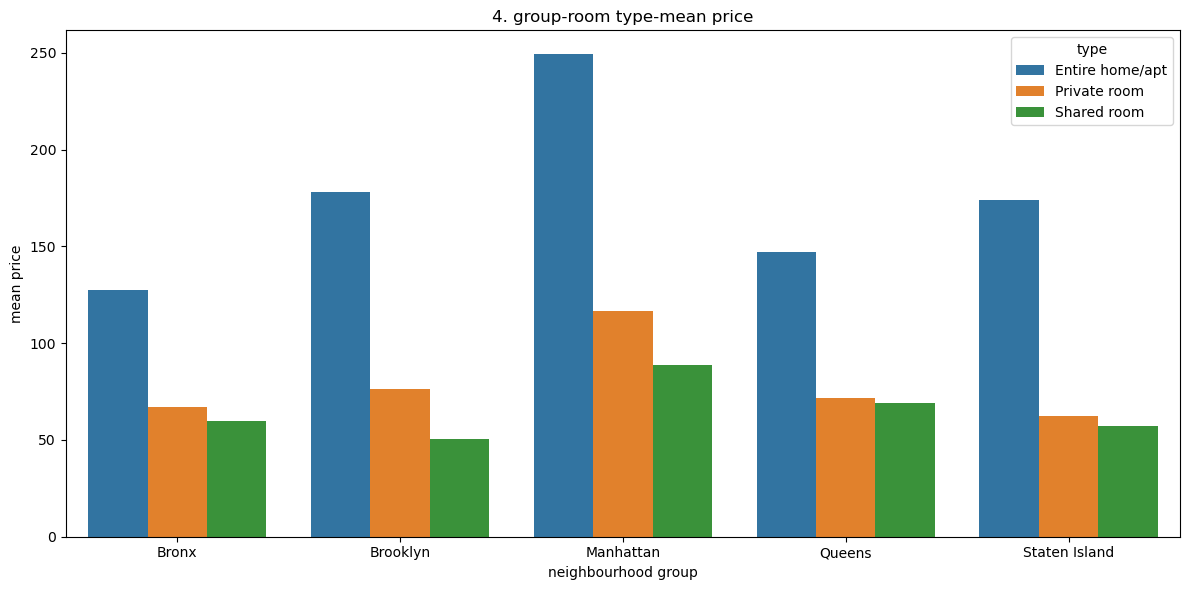

In [343]:
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=avg_price)

plt.title('4. group-room type-mean price', fontsize=12)
plt.xlabel('neighbourhood group', fontsize=10)
plt.ylabel('mean price', fontsize=10)
plt.legend(title='type')
plt.tight_layout()
plt.show()

### 2.4 price - number of reviews
    Figure5 shows:
    Properties with high prices (>$4,000) tend to have fewer reviews (<20)
    Properties with many reviews (>300) tend to have lower prices (<$1,000)
    But There appear to be a weakly negative correlation between price and number of reviews
    
    Findings
    More affordable properties tend to get more reviews, suggesting higher booking frequency, high-price properties receive fewer reviews, possibly due to lower booking frequency, so price and number of reviews don't have linear in this case.
    The most reviewed properties are in the middle to lower price range, suggesting this is the most active market segment


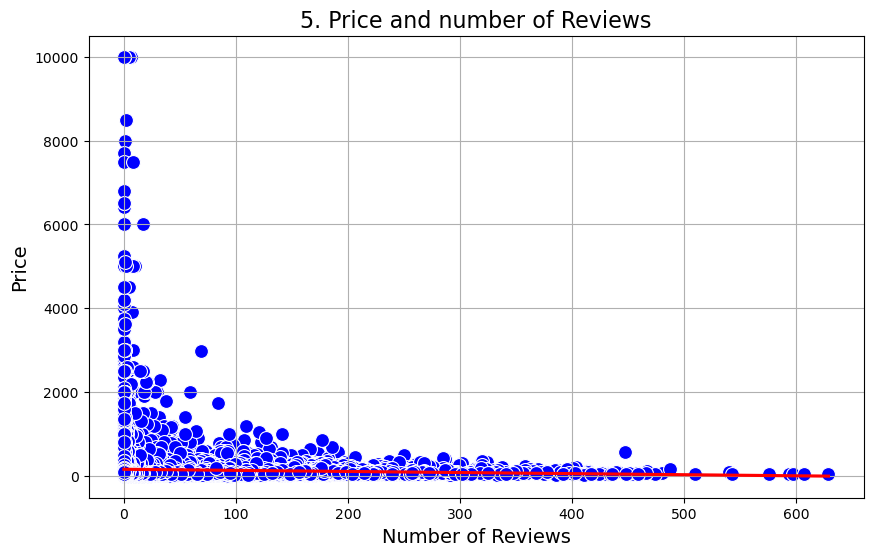

In [245]:
data = pd.read_csv('AB_2_modified.csv')  
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, color='blue', s=100)

sns.regplot(x='number_of_reviews', y='price', data=df, scatter=False, color='red')

plt.title('5. Price and number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()


## 3. Hypothesis Testing 

### 3.1
We could test whether **at least one** neighbourhood group has a different average price. Let $\mu_1,\mu_2,\mu_3,\mu_4,\mu_5$ denote the average pice for different neighbourhood group.   

$H_0:  \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 $ $\quad$ vs $\quad$ $H_1:\text{not all five population means are equal}$.

    The resutls of testing:
    p-value = 0.0000 (< 0.05)
    This strongly confirms our previous conclusion that there are significant differences in housing prices among the five neighborhood groups

In [307]:
from scipy.stats import shapiro
from scipy.stats import f_oneway

groups = df['neighbourhood_group'].unique()
prices_by_group = [df[df['neighbourhood_group'] == group]['price'] for group in groups]

# Test normality for each group
print("Normality Tests:")
for i, prices in enumerate(prices_by_group):
    stat, p_value = shapiro(prices)
    print(f"Group {groups[i]} - Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p_value:.4f}")


Normality Tests:
Group Brooklyn - Shapiro-Wilk Test: Statistic=0.2808, p-value=0.0000
Group Manhattan - Shapiro-Wilk Test: Statistic=0.3184, p-value=0.0000
Group Queens - Shapiro-Wilk Test: Statistic=0.2047, p-value=0.0000
Group Staten Island - Shapiro-Wilk Test: Statistic=0.1819, p-value=0.0000
Group Bronx - Shapiro-Wilk Test: Statistic=0.3793, p-value=0.0000


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20104.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21661.
  res = hypotest_fun_out(*samples, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5666.
  res = hypotest_fun_out(*samples, **kwds)


In the normality test all five groups (Brooklyn, Manhattan, Queens, Staten Island, and Bronx) have p-values = 0.0000, which is < 0.05. This means the price data in each neighborhood group significantly deviates from a normal distribution, so we should use a non-parametric alternative to ANOVA, specifically the Kruskal-Wallis test.

In [303]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis H-test
h_stat, p_value_kw = kruskal(*prices_by_group)
print("\nKruskal-Wallis Test Results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_value_kw:.4f}"
# Print interpretation
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Reject H0 at {alpha} significance level.")
    print("There is sufficient evidence to conclude that not all five population means are equal.")
else:
    print(f"Fail to reject H0 at {alpha} significance level.")
    print("There is not enough evidence to conclude that the population means differ.")


Kruskal-Wallis Test Results:
H-statistic: 7027.2408
p-value: 0.0000

Interpretation:
Reject H0 at 0.05 significance level.
There is sufficient evidence to conclude that not all five population means are equal.


### 3.2 
This test assesses the strength and direction of the **linear relationship** between two the number of reviews and price. $H_0: \text{There is no linear correlation between the number of reviews and price, } \rho = 0$ $\quad$ vs $\quad$ $H_1:\text{There is linear correlation between the two variables, } \rho \neq 0$ 

In [323]:
from scipy.stats import pearsonr  #, spearmanr

# Perform Pearson Correlation Test
# Keep only samples with valid reviews and price data
clean_data = df.dropna(subset=['number_of_reviews', 'price'])

# Run the test
pearson_corr, pearson_p = pearsonr(clean_data['number_of_reviews'], clean_data['price'])

# Output the results with four decimal places
print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")


Pearson Correlation Coefficient: -0.0480, p-value: 0.0000


p-value < 0.05 : reject H0. There is a significant correlation between number of reviews and price.
However, this correlation is extremely weak (correlation coefficient of only -0.048).
Hence, there is virtually no meaningful association between price levels and number of reviews.

## 4. Summary


    Pricing Strategy Recommendations for New York City Airbnb Hosts:
 
    neighbouhood groop-based Price Differentiation:  
    Manhattan: Highest price potential across all accommodation types, particularly strong premium for entire home/apartment listings;
    Brooklyn: Positions as second most expensive borough;
    Queens: Mid-range pricing territory;
    Staten Island & Bronx: Lower price points, more affordable pricing structure required, and focus on value proposition for budget-conscious travelers

    A consistent pricing hierarchy exists across all boroughs:
    Entire home/apartments: Highest price point
    Private rooms: Medium price point
    Shared rooms: Lowest price point

## 5. Role of Human and Generative AI

    In my project, AI is an excellent assistant by helping me identify and fix code errors in Jupyter Notebook, providing guidance when I lack solutions, and explaining unfamiliar concept, as previously demonstrated 3.1 hypothesis testing where it helped me understand the need to switch from ANOVA to the Kruskal-Wallis test for non-normal data.
    While AI has significantly improved my efficiency and saved time in report writing, I've realized that over-reliance on AI faces to challenges for developing skills, particularly in understanding code logic, as I might simply apply its solutions without deep comprehension.
    Therefore, I've concluded that while AI serves as an excellent assistant for my assignment, it's crucial to maintain my own thinking framework and code implementation based on personal understanding, ensuring AI remains a supportive tool rather than the primary driver of my work.

## 6. References

    [1]Weiss, Neil(2010). Introductory Statistics, 9th ed. Pearson.
    [2]Kerns, G.J.(2010). Introduction to probability and Statistics using r.
    [3]Kruskal, W. H., & Wallis, W. A. (1952). "Use of ranks in one-criterion variance analysis." Journal of the American Statistical Association, 47(260), 583-621.